# Analítica de datos
# Examen parcial 1
# 2019-01
# <font color='red'> NOMBRE APELLIDO, código </font>

El dataset que deben analizar contiene registros de pacientes con síntomas de problemas cardíacos.
Se tienen los datos provenientes bases de datos de enfermedades del corazón, provenientes de diferentes centros médicos:
- Cleveland Clinic Foundation
- Hungarian Institute of Cardiology, Budapest
- University Hospital, Zurich, & University Hospital, Basel, Switzerland 

Los campos del dataset son los siguientes:
1. ciudad: ciudad del paciente (Cleveland, Hungria, Suiza)
2. edad: en años
3. sexo: "1"=hombre, "0"=mujer
4. tipo_dolor: tipo de dolor de pecho ("1"=angina típico, "2"=angina atípico, "3"=dolor no de angina, "4"=sin síntoma de dolor)
5. presion: presión de la sangre en reposo (en mm/Hg, en el momento de admisión al hospital)
6. colesterol: en densidad del colesterol (en mg/dl)
7. azucar: indica si el nivel de azucar en la sangre en ayunas es superior a 120 mg/dl ("1") o no ("0")
8. ecg: resultado el electro cardiograma ("0"=normal, "1"=anormalidad del nivel de ST, "2"=hipertrofía ventricular probable)
9. pulso: frecuencia cardiaca máxima alcanzada
10. angina: si se induce a una angina a través del ejercicio ("1") o no ("0")
11. st: diferencia relativa entre el nivel de ST inducido por el ejercicio comparado con el nivel del reposo.
12. pendiente: la pendiente de llegada al máximo del nivel ST durante el ejercicio ("1"creciente, "2"=plana, "3"=decreciente)
13. venas: número de venas coloreadas a partir de la fluorescopia (0 a 3)
14. thal: tipo de defecto (valores aceptados 3=normal, 4=defecto arreglado, 7=defecto reversible)
15. target: indica si en efecto el paciente presenta una enfermedad cardiaca ("1", "2", "3", "4") o no ("0")

La idea es poder predecir, utilizando dos tipos de modelo de aprendizaje supervisado (KNN y NaiveBayes) y las variables independientes disponibles qué pacientes pueden presentar mayor o menor riesgo de tener una enfermedad cardiaca. Vamos entonces a considerar como categoría positiva los valores "1", "2", "3" y "4" de la variable *target*, y como categoría negativa su valor "0".

# 1. Entendimiento de los datos, limpieza

El archivo "DatosCorazon.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

## Puntos a desarrollar

1. <font color='red'>Carguen el archivo en memoria y exploren los datos. Antes de hacer limpieza identifiquen las proporciones de los datos provenientes de cada centro médico (ciudad), el baseline global (0.3) y los baselines por ciudad (0.3), y el baseline global . No olviden las convenciones de la variable objetiva definidas con respecto a como se define la clase positiva. 
   ¿Cree que es una buena idea diagnosticar a un paciente de Cleveland utilizando un modelo entrenado con todos los datos disponibles de las 3 ciudades? (0.2).</font>

1. <font color='red'>Identifiquen los problemas e inconsistencias que tienen los datos, teniendo en cuenta el diccionario de datos y el contexto del problema. Limpien los datos, argumentando las razones de cada transformación o eliminación de datos.
(1.5)</font>

Tenga en cuenta lo siguiente: 
- para modificar ciertos valores de un dataframe, se utiliza "df.replace('oldvalue', 'newvalue')", si se trata de un valor NaN, se utiliza *np.nan* (ya sea el oldvalue o el newvalue)
- para cambiar un tipo de dato a numérico en una estructura de pandas, se utiliza su método ".astype('float64')"
- para negar una condición en python se utiliza el símbolo "~"
- para obtener una tabla de frecuencias de los registros (filas) con respecto al valor de una variable categórica se utiliza "pd.crosstab(index=df['var'], columns="conteo")
- para cambiar los valores de una columna en un dataframe con condiciones, utilizar "df.loc[condicion, 'columna']=newVal"
- cuando haya atributos con demasiados valores faltantes, pueden eliminar la columna correspondiente.
- cuando haya atributos con unos pocos valores faltantes, pueden eliminar los registros correspondientes.
- cuando el número de valores faltantes de un atributo no sea tan elevado, pero si sea considerable, pueden reemplazar los valores faltantes:
  - Si se trata de una variable categórica, pueden crear un nuevo valor, o reemplazar por la categoría más común
  - Si se trata de una variable numérica, pueden reemplazar por el promedio de los valores presentes del atributo

# 1.1 Carga y baselines pre-limpieza de datos

In [2]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing 
import seaborn as sns

## Carga y modificación

+ Se cargan los datos y se agregan los nombres de columnas inexistentes al archivo.

In [4]:
cNames = ["ciudad","edad","sexo", "tipo_dolor", "presion", "colesterol","azucar","ecg", "pulso","angina","st","pendiente","venas","thal","target"]

data = pd.read_csv("DatosCorazon.csv", sep=";",names=cNames)
data.columns

Index(['ciudad', 'edad', 'sexo', 'tipo_dolor', 'presion', 'colesterol',
       'azucar', 'ecg', 'pulso', 'angina', 'st', 'pendiente', 'venas', 'thal',
       'target'],
      dtype='object')

+ Obtención de las proporciones de los datos provenientes de cada una de las ciudades.

In [5]:
ciudades = data.groupby(["ciudad"])
ciudades = ciudades[["ciudad"]].count().add_prefix("Porcentaje_de_")
ciudades.head()
ciudades.apply(lambda x: x/x.sum()).reset_index()


,ciudad,Porcentaje_de_ciudad
0,Cleveland,0.420833
1,Hungria,0.408333
2,Suiza,0.170833


## Baseline global

Debemos converitr los valores de targer para 1,2,3 y 4 a 1. Los valores tanto para el target = 0 y target = 1,2,3,4 son iguales. Así, el bas

In [27]:
data = data.replace({2:1,3:1,4:1})
data.target.values

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

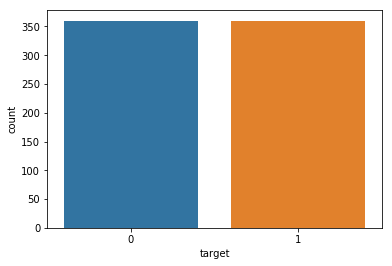

In [28]:
ax = sns.countplot(x="target", data=data)

In [26]:
prediccion = data.groupby(["target"])
prediccion = prediccion[["target"]].count().add_prefix("Total_de_").reset_index()
prediccion

,target,Total_de_target
0,0,360
1,1,360


In [29]:
prediccion.iloc[1:5].sum()

target               1
Total_de_target    360
dtype: int64

## Baseline Cleveland

In [66]:
clevelan = data[data.ciudad == "Cleveland"]
clevelan = clevelan.groupby(["target"])
clevelan = clevelan[["target"]].count().add_prefix("Total_de")
clevelan = clevelan.apply(lambda x: x/x.sum()).reset_index()
clevelan

target            1.000000
Total_detarget    0.458746
dtype: float64


,target,Total_detarget
0,0,0.541254
1,1,0.458746


## Baseline Suiza

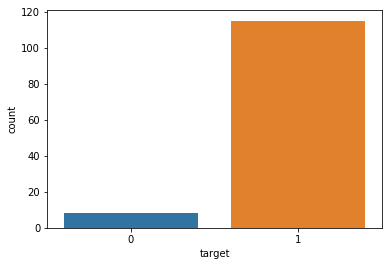

In [88]:
suiza = data[data.ciudad == "Suiza"]
cx = sns.countplot(x="target", data=suiza)

In [89]:
suiza = suiza.groupby(["target"])
suiza = suiza[["target"]].count().add_prefix("Total_de")
suiza = suiza.apply(lambda x: x/x.sum()).reset_index()
print(suiza.iloc[1:5].sum())
suiza

target            1.000000
Total_detarget    0.934959
dtype: float64


,target,Total_detarget
0,0,0.065041
1,1,0.934959


## Baseline Hungria

In [84]:
hungria = data[data.ciudad == "Hungria"]
hungria.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
303,Hungria,28,1,1,130.0,132.000000,0,2,185,0,0.0,2,?,3,0
304,Hungria,29,1,1,120.0,243.000000,0,0,160,0,0.0,2,?,3,0
305,Hungria,29,1,1,140.0,204.774749,0,0,170,0,0.0,2,?,3,0
306,Hungria,30,0,1,170.0,237.000000,0,1,170,0,0.0,2,?,6,0
307,Hungria,31,0,1,100.0,219.000000,0,1,150,0,0.0,2,?,3,0


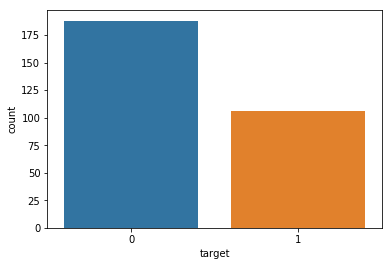

In [85]:
bx = sns.countplot(x="target",data=hungria)

In [86]:
hungria = hungria.groupby(["target"])
hungria = hungria[["target"]].count().add_prefix("Total_de")
hungria = hungria.apply(lambda x : x/x.sum()).reset_index()
print(hungria.iloc[1:5].sum())
hungria

target            1.000000
Total_detarget    0.360544
dtype: float64


,target,Total_detarget
0,0,0.639456
1,1,0.360544


In [33]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null float64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null object
colesterol    720 non-null object
azucar        720 non-null object
ecg           720 non-null object
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: float64(1), int64(3), object(11)
memory usage: 84.5+ KB


,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63.0,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0
1,Cleveland,67.0,1,1,160.0,286.0,0,2,108.0,1,1.5,2,3,3,1
2,Cleveland,67.0,1,1,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
3,Cleveland,37.0,1,1,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0
4,Cleveland,41.0,0,1,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0


In [34]:
data.describe(include="all")

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
count,720,720.000000,720.000000,720.0,720,720,720,720,720,720,720,720,720,720,720.000000
unique,3,NaN,NaN,NaN,86,307,3,4,188,3,61,6,6,6,NaN
top,Cleveland,NaN,NaN,NaN,120,0,0,0,150,0,0,2,?,?,NaN
freq,303,NaN,NaN,NaN,78,123,567,471,32,476,330,290,413,320,NaN
mean,NaN,51.888889,0.738889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
std,NaN,9.193720,0.439546,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500348
min,NaN,28.000000,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,45.000000,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,53.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000
75%,NaN,58.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [35]:
data[data["colesterol"]=="?"]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
305,Hungria,29.0,1,1,140,?,0,0,170,0,0,?,?,?,0
334,Hungria,39.0,1,1,120,?,0,1,146,0,2,1,?,?,0
337,Hungria,39.0,1,1,130,?,0,0,120,0,0,?,?,?,0
347,Hungria,40.0,1,1,140,?,0,0,188,0,0,?,?,?,0
368,Hungria,43.0,0,1,150,?,0,0,175,0,0,?,?,3,0
375,Hungria,45.0,0,1,180,?,0,0,180,0,0,?,?,?,0
378,Hungria,45.0,1,1,135,?,0,0,110,0,0,?,?,?,0
389,Hungria,47.0,0,1,130,?,0,0,145,0,2,2,?,?,0
394,Hungria,48.0,0,1,120,?,1,1,148,0,0,?,?,?,0
400,Hungria,48.0,1,1,100,?,0,0,100,0,0,?,?,?,0


## Limpieza de registros anomalos y cambio de tipos
### Columna edad y colesterol
+ La columna **edad** aparece con el tipo de dato float y se cambia al tipo int64.
+ La columna **colesterol** tiene tipo de dato object y algunos registros son están vacios.
    - Todos los registros vacios (?) se cambian a None.
    - Se cambia el tipo a float.
    - Los registros vacios (None) son reemplazados por el promedio.

In [36]:
data.edad=data.edad.astype("int64")
data.loc[data["colesterol"]=="?",'colesterol']=None
data.colesterol=data.colesterol.astype("float64")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null object
colesterol    697 non-null float64
azucar        720 non-null object
ecg           720 non-null object
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 84.5+ KB


In [37]:
data.loc[data.colesterol.isnull(),'colesterol']=data.colesterol.mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null object
colesterol    720 non-null float64
azucar        720 non-null object
ecg           720 non-null object
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 84.5+ KB


In [38]:
data.tail()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
715,Suiza,70,1,1,115,0.0,0,1,92,1,0,2,?,7,1
716,Suiza,70,1,1,140,0.0,1,0,157,1,2,2,?,7,1
717,Suiza,72,1,1,160,0.0,?,2,114,0,1.6,2,2,?,0
718,Suiza,73,0,1,160,0.0,0,1,121,0,0,1,?,3,1
719,Suiza,74,1,1,145,0.0,?,1,123,0,1.3,1,?,?,1


### Columna presión
+ A la columna **presión** se aplica el mismo proceso que a la anterior.

In [39]:
data[data["presion"]=="?"]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
393,Hungria,48,0,1,?,308.0,0,1,?,?,2,1,?,?,0
599,Suiza,35,1,1,?,0.0,?,0,130,1,?,?,?,7,1
714,Suiza,69,1,1,?,0.0,0,1,?,?,?,?,?,7,1


In [40]:
data.loc[data["presion"]=="?",'presion']=None
data.presion=data.presion.astype("float64")
data.loc[data.presion.isnull(),'presion']=data.presion.mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null object
ecg           720 non-null object
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: float64(2), int64(4), object(9)
memory usage: 84.5+ KB


### Columna azucar
+ A la columna **azucar** es de tipo object y tiene registros vacios (?).
    - Se cambian los registros vacios(?) a None
    - Se cambia el tipo a **category**
    - A todos los registros vacios(None) se ponen en 0.

In [41]:
data[data["azucar"]=="?"].head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
330,Hungria,38,0,1,120.0,275.0,?,0,129,0,0,?,?,?,0
384,Hungria,46,1,1,150.0,163.0,?,0,116,0,0,?,?,?,0
410,Hungria,49,1,1,120.0,297.0,?,0,132,0,1,2,?,?,0
434,Hungria,53,0,1,113.0,468.0,?,0,127,0,0,?,?,?,0
447,Hungria,54,0,1,140.0,309.0,?,1,140,0,0,?,?,?,0


In [42]:
data.loc[data["azucar"]=="?",'azucar']=None
data.azucar=data.azucar.astype("category")
data.loc[data.azucar.isnull(),'azucar']=data.azucar.mode()[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null object
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: category(1), float64(2), int64(4), object(8)
memory usage: 79.6+ KB


### Columna ECG
+ A la columna **ecg** se aplica el mismo proceso que a la anterior.

In [43]:
data[data["ecg"]=="?"]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
571,Hungria,55,1,1,140.0,295.0,0,?,136,0,0,?,?,?,1
598,Suiza,34,1,1,115.0,0.0,0,?,154,0,.2,1,?,?,1


In [44]:
data.loc[data["ecg"]=="?",'ecg']=None
data.ecg=data.ecg.astype("category")
data.loc[data.ecg.isnull(),'ecg']=data.ecg.mode()[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null category
pulso         720 non-null object
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: category(2), float64(2), int64(4), object(7)
memory usage: 74.8+ KB


### Columna pulso

In [248]:
data[data["pulso"]=="?"]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
393,Hungria,48,0,2,131.804742,308.0,0,1,?,?,2,1,?,?,0
714,Suiza,69,1,4,131.804742,0.0,0,1,?,?,?,?,?,7,3


In [45]:
data.loc[data["pulso"]=="?",'pulso']=None
data.pulso=data.pulso.astype("float64")
data.loc[data.pulso.isnull(),'pulso']=round(data.pulso.mean())
data.pulso=data.pulso.astype("str")
data.pulso=data.pulso.replace('\.0', '', regex=True)
data.pulso=data.pulso.astype("int64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null category
pulso         720 non-null int64
angina        720 non-null object
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: category(2), float64(2), int64(5), object(6)
memory usage: 74.8+ KB


### Columna angina

In [46]:
data[data["angina"]=="?"]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
393,Hungria,48,0,1,131.804742,308.0,0,1,141,?,2,1,?,?,0
714,Suiza,69,1,1,131.804742,0.0,0,1,141,?,?,?,?,7,1


In [47]:
data.loc[data["angina"]=="?",'angina']=None
data.angina=data.angina.astype("category")
data.loc[data.angina.isnull(),'angina']=data.angina.mode()[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null category
pulso         720 non-null int64
angina        720 non-null category
st            720 non-null object
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: category(3), float64(2), int64(5), object(5)
memory usage: 70.0+ KB


### Columna ST

In [48]:
data[data["st"]=="?"]

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
599,Suiza,35,1,1,131.804742,0.0,0,0,130,1,?,?,?,7,1
606,Suiza,38,1,1,150.000000,0.0,0,0,120,1,?,?,?,3,1
636,Suiza,52,1,1,95.000000,0.0,0,0,82,1,?,?,?,?,1
705,Suiza,65,1,1,145.000000,0.0,0,1,67,0,?,?,?,6,1
707,Suiza,65,1,1,160.000000,0.0,1,1,122,0,?,?,?,7,1
714,Suiza,69,1,1,131.804742,0.0,0,1,141,0,?,?,?,7,1


In [49]:
data.loc[data["st"]=="?",'st']=None
data.st=data.st.astype("float64")
data.loc[data.st.isnull(),'st']=data.st.mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null category
pulso         720 non-null int64
angina        720 non-null category
st            720 non-null float64
pendiente     720 non-null object
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: category(3), float64(3), int64(5), object(4)
memory usage: 70.0+ KB


### Columna pendiente

In [50]:
data[data["pendiente"]=="?"].head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
303,Hungria,28,1,1,130.0,132.000000,0,2,185,0,0.0,?,?,?,0
304,Hungria,29,1,1,120.0,243.000000,0,0,160,0,0.0,?,?,?,0
305,Hungria,29,1,1,140.0,204.774749,0,0,170,0,0.0,?,?,?,0
306,Hungria,30,0,1,170.0,237.000000,0,1,170,0,0.0,?,?,6,0
307,Hungria,31,0,1,100.0,219.000000,0,1,150,0,0.0,?,?,?,0


In [51]:
data.loc[data["pendiente"]=="?",'pendiente']=None
data.pendiente=data.pendiente.astype("category")
data.loc[data.pendiente.isnull(),'pendiente']=data.pendiente.mode()[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null category
pulso         720 non-null int64
angina        720 non-null category
st            720 non-null float64
pendiente     720 non-null category
venas         720 non-null object
thal          720 non-null object
target        720 non-null int64
dtypes: category(4), float64(3), int64(5), object(3)
memory usage: 65.2+ KB


### Columna venas
+ Los datos vacios(?) son mas de la mitad entonces se procede a eliminar la columna

In [60]:
data[data["venas"]=="?"].head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
166,Cleveland,52,1,1,138.0,223.0,0,0,169,0,0.0,1.0,?,3.0,0
192,Cleveland,43,1,1,132.0,247.0,1,2,143,1,0.1,2.0,?,7.0,1
287,Cleveland,58,1,1,125.0,220.0,0,0,144,0,0.4,2.0,?,7.0,0
302,Cleveland,38,1,1,138.0,175.0,0,0,173,0,0.0,1.0,?,3.0,0
303,Hungria,28,1,1,130.0,132.0,0,2,185,0,0.0,2,?,3,0


In [62]:
pd.crosstab(index=data["venas"],columns="count")

col_0,count
venas,
0,177
0.0,2
1,67
2,41
3,20
?,413


In [58]:
data.drop(["venas"],axis=1)

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,thal,target
0,Cleveland,63,1,1,145.000000,233.0,1,2,150,0,2.300000,3,6,0
1,Cleveland,67,1,1,160.000000,286.0,0,2,108,1,1.500000,2,3,1
2,Cleveland,67,1,1,120.000000,229.0,0,2,129,1,2.600000,2,7,1
3,Cleveland,37,1,1,130.000000,250.0,0,0,187,0,3.500000,3,3,0
4,Cleveland,41,0,1,130.000000,204.0,0,2,172,0,1.400000,1,3,0
5,Cleveland,56,1,1,120.000000,236.0,0,0,178,0,0.800000,1,3,0
6,Cleveland,62,0,1,140.000000,268.0,0,2,160,0,3.600000,3,3,1
7,Cleveland,57,0,1,120.000000,354.0,0,0,163,1,0.600000,1,3,0
8,Cleveland,63,1,1,130.000000,254.0,0,2,147,0,1.400000,2,7,1
9,Cleveland,53,1,1,140.000000,203.0,1,2,155,1,3.100000,3,7,1


In [53]:
data['azucar'].describe()

count     720
unique      2
top         0
freq      650
Name: azucar, dtype: object

In [54]:
data['azucar'].dtype

CategoricalDtype(categories=['0', '1'], ordered=False)

### Columna thal

Se procede igual que con la columna **azucar**

In [55]:
data[data["thal"]=="?"].head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
87,Cleveland,53,0,1,128.0,216.000000,0,2,115,0,0.0,1,0.0,?,0
266,Cleveland,52,1,1,128.0,204.000000,1,0,156,1,1.0,2,0.0,?,1
303,Hungria,28,1,1,130.0,132.000000,0,2,185,0,0.0,2,?,?,0
304,Hungria,29,1,1,120.0,243.000000,0,0,160,0,0.0,2,?,?,0
305,Hungria,29,1,1,140.0,204.774749,0,0,170,0,0.0,2,?,?,0


In [56]:
data.loc[data["thal"]=="?",'thal']=None
data.thal=data.thal.astype("category")
data.loc[data.thal.isnull(),'thal']=data.thal.mode()[0]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
ciudad        720 non-null object
edad          720 non-null int64
sexo          720 non-null int64
tipo_dolor    720 non-null int64
presion       720 non-null float64
colesterol    720 non-null float64
azucar        720 non-null category
ecg           720 non-null category
pulso         720 non-null int64
angina        720 non-null category
st            720 non-null float64
pendiente     720 non-null category
venas         720 non-null object
thal          720 non-null category
target        720 non-null int64
dtypes: category(5), float64(3), int64(5), object(2)
memory usage: 60.5+ KB


In [57]:
data.head()

,ciudad,edad,sexo,tipo_dolor,presion,colesterol,azucar,ecg,pulso,angina,st,pendiente,venas,thal,target
0,Cleveland,63,1,1,145.0,233.0,1,2,150,0,2.3,3,0,6,0
1,Cleveland,67,1,1,160.0,286.0,0,2,108,1,1.5,2,3,3,1
2,Cleveland,67,1,1,120.0,229.0,0,2,129,1,2.6,2,2,7,1
3,Cleveland,37,1,1,130.0,250.0,0,0,187,0,3.5,3,0,3,0
4,Cleveland,41,0,1,130.0,204.0,0,2,172,0,1.4,1,0,3,0


## 1.2 Análisis y solución de los problemas de calidad de datos

....

....

....


# 2. Modelamiento con K-NN y Naïve Bayes

## Puntos a desarrollar:

<font color='red'>Construya y escoja el mejor modelo de diagnóstico posible (buscando los mejores parámetros) utilizando las técnicas KNN y NaïveBayes para un paciente de Cleveland. Básese en la métrica de evaluación del modelo adecuada, utilizando 10-fold cross validation para encontrar los parámetros ideales del modelo</font>

1. <font color='red'> Construcción del mejor modelo en KNN para Cleveland. Solo considere las variables independientes numéricas. (1.0)</font>


2. <font color='red'> Construcción del mejor modelo en NaiveBayes para Cleveland.</font>

2.1. <font color='red'>Para las variables numéricas utilice un GaussianNB, buscando el mejor valor del parámetro var_smoothing entre 0.1 Y 5. (0.6)</font>

2.2. <font color='red'>Para las variables categóricas utilice un BernouilliNB, buscando el mejor valor del parámetro alpha (suavizador de Lapace) entre 1 y 100. (0.8)</font>

2.3. <font color='red'>Concluya sobre la calidad de los modelos y su escogencia. (0.3)</font>

2.4. <font color='red'>**BONUS!!!!!** Construya un modelo que agrupe los dos clasificadores de Naive Bayes. Utilice las probabilidades de predicción de cada clase que se obtienen con el método "modelo.predict_proba(X)" tanto para el modelo de variables numéricas como para el modelo con las variables categóricas y multiplíquelas, prediciendo entonces la clases con mayo verosimilitud (0.5)</font>


Tenga en cuenta lo siguiente: 
- Utilice holdout 70% y 30% para evaluar el modelo final. Particione los datos inicialmente en entrenamiento y test. Utilice un random_state=12345 en el método train_test_split para poder reproducir los resultados.
- Utilice 10-fold cross validation para buscar el mejor valor de los parámetros utilizando solo el set de entrenamiento.
- Una vez que el valor de los parámetros ideal se ha encontrado, evalúe sobre el test set, calculando las métricas correspondientes

## 2.1 Modelo KNN para variables numéricas

....

....

....


## 2.2 Modelo Naïve Bayes para variables numéricas

### Modelo para variables numéricas

....

....


### Modelo para variables categóricas

....

....


### Modelo global

....

....
